In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
Customer_Acq=pd.read_csv("C:/Users/Vishal/Desktop/Python/4. Pandas Case Study 2 - Credit Card Case Study/Customer Acqusition.csv")
Spend=pd.read_csv("C:/Users/Vishal/Desktop/Python/4. Pandas Case Study 2 - Credit Card Case Study/spend.csv")
Repayment=pd.read_csv("C:/Users/Vishal/Desktop/Python/4. Pandas Case Study 2 - Credit Card Case Study/Repayment.csv")

In [3]:
Customer_Acq.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [4]:
Customer_Acq.drop(columns=['No'],inplace=True)

In [5]:
Spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


In [6]:
Spend.drop(columns=['Sl No:'],inplace=True)

In [7]:
Spend.rename(columns={'Amount':'Spend_Amount'},inplace=True)

In [8]:
Repayment.head(2)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN


In [9]:
Repayment.drop(columns=['SL No:','Unnamed: 4'],inplace=True)

In [10]:
Repayment.rename(columns={'Amount':'Repayment_Amount'},inplace=True)

In [11]:
Customer_Acq.head(2)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [12]:
Age=Customer_Acq.Age.mean()

Age=round(Age)

def fn_age(x):
    for a in Customer_Acq.Age:
        if(x<18):
            x=Age
            return(x)
        else:
            return(x)
        
Customer_Acq['Age']=Customer_Acq['Age'].apply(lambda x: fn_age(x))

print("1.a After chnaging the age with mean the table looks like",'\n \n',Customer_Acq.head())

1.a After chnaging the age with mean the table looks like 
 
   Customer  Age       City   Product     Limit Company        Segment
0       A1   76  BANGALORE      Gold  500000.0      C1  Self Employed
1       A2   71   CALCUTTA    Silver  100000.0      C2   Salaried_MNC
2       A3   34     COCHIN  Platimum   10000.0      C3   Salaried_Pvt
3       A4   47     BOMBAY  Platimum   10001.0      C4           Govt
4       A5   56  BANGALORE  Platimum   10002.0      C5  Normal Salary


In [13]:
Repayment.head(2)

,Customer,Month,Repayment_Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02


In [14]:
Spend.head(2)

,Customer,Month,Type,Spend_Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13


In [15]:
Customer_Acq.head(2)

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [16]:
Credit_card=pd.merge(Customer_Acq,Spend,how='left',on='Customer')

In [17]:
count=0

for x in range(0,1500):
    if(Credit_card.Limit.iloc[x]<Credit_card.Spend_Amount.iloc[x]):
        Credit_card.Spend_Amount.iloc[x]=Credit_card.Limit.iloc[x]*0.5
        count+=1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
print('1.b The new table after adjucting the spent amount wrt the credit card limit is')

Credit_card.head()

1.b The new table after adjucting the spent amount wrt the credit card limit is


,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Spend_Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07


In [19]:
Credit_card=pd.merge(Credit_card,Repayment,how='inner',on=('Customer','Month'))

In [20]:
count=0

for x in range(0,863):
    if(Credit_card.Limit.iloc[x]<Credit_card.Repayment_Amount.iloc[x]):
        Credit_card.Repayment_Amount.iloc[x]=Credit_card.Limit.iloc[x]
        count+=1

In [21]:
print('1.c The new table after adjucting the repayment amount wrt the credit card limit is ')

Credit_card.head()

1.c The new table after adjucting the repayment amount wrt the credit card limit is 


,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Spend_Amount,Repayment_Amount
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,495414.75
1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,350446.82
2,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,TRAIN TICKET,440563.22,495414.75
3,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,TRAIN TICKET,440563.22,350446.82
4,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13,245899.02


In [22]:
Num=Credit_card.Customer.nunique()

print('2.a The total number of distict customers are',Num)

2.a The total number of distict customers are 100


In [23]:
Catg=Credit_card.Type.nunique()

print('2.b The total number of distict categories are',Catg)

2.b The total number of distict categories are 15


In [24]:
Credit_card['Month']=pd.to_datetime(Credit_card.Month,format=('%d-%b-%y'))

New_table=Credit_card
New_table.set_index('Month',inplace=True)

New_table2=New_table.resample('M').mean()
New_table2.dropna(inplace=True)

print("2.c The average monthly spend by customers is ",'\n\n', New_table2['Spend_Amount'])

2.c The average monthly spend by customers is  

 Month
2004-01-31    152679.032306
2004-02-29    124098.224615
2004-03-31    214381.002000
2004-04-30     84580.377500
2004-05-31     76680.121250
2004-09-30    253033.595000
2004-11-30    114546.332000
2005-01-31    225252.435000
2005-02-28    177300.949643
2005-04-30     85217.405455
2005-05-31    167056.485200
2005-06-30    154409.785000
2005-07-31     57882.300000
2005-08-31    125360.822222
2005-09-30    132683.844000
2005-10-31    114172.092000
2005-11-30    179810.517692
2005-12-31    178414.630000
2006-01-31    254002.206000
2006-02-28    144429.850000
2006-03-31    150854.715490
2006-04-30    120899.863793
2006-05-31    102126.635909
2006-06-30    141153.406667
2006-07-31    186764.023750
2006-08-31    229720.620000
2006-09-30    183302.980000
2006-10-31    247410.367500
2006-11-30    206207.333750
2006-12-31    239256.802500
Name: Spend_Amount, dtype: float64


In [25]:
print("2.d The average monthly repayment by customers is ",'\n\n', New_table2['Repayment_Amount'])

2.d The average monthly repayment by customers is  

 Month
2004-01-31    168011.968222
2004-02-29    104611.463077
2004-03-31    231033.168000
2004-04-30     98593.678750
2004-05-31    162203.560000
2004-09-30    208867.745000
2004-11-30    152581.340000
2005-01-31    171000.652143
2005-02-28    196570.010268
2005-04-30    122542.270000
2005-05-31    218382.564200
2005-06-30    134254.051111
2005-07-31    112001.640000
2005-08-31    126606.633333
2005-09-30     80788.362000
2005-10-31    205037.904000
2005-11-30    237357.707692
2005-12-31    255658.184000
2006-01-31    302988.674000
2006-02-28    168754.142105
2006-03-31    156587.265588
2006-04-30    165941.162414
2006-05-31    177182.129091
2006-06-30    216022.196667
2006-07-31    234470.061250
2006-08-31    230670.545000
2006-09-30    319092.290000
2006-10-31    260131.567500
2006-11-30    299298.461250
2006-12-31    215885.382500
Name: Repayment_Amount, dtype: float64


In [26]:
New_table2['Profit']=New_table2.Repayment_Amount-New_table2.Spend_Amount

Null_value=float('NaN')

def fn_elmtr(x):
    for a in New_table2.Profit:
        if x<0:
            return(Null_value)
        else:
            return(x)
        
New_table2['Profit']=New_table2['Profit'].apply(lambda x: fn_elmtr(x))
New_table2.dropna(inplace=True)
New_table2['Profit']=New_table2['Profit']*(2.9/100)

print("2.e The profit for each month for the bank is \n\n",New_table2.Profit)

2.e The profit for each month for the bank is 

 Month
2004-01-31     444.655142
2004-03-31     482.912814
2004-04-30     406.385736
2004-05-31    2480.179724
2004-11-30    1103.015232
2005-02-28     558.802758
2005-04-30    1082.421072
2005-05-31    1488.456291
2005-07-31    1569.460860
2005-08-31      36.128522
2005-10-31    2635.108548
2005-11-30    1668.868510
2005-12-31    2240.063066
2006-01-31    1420.607572
2006-02-28     705.404471
2006-03-31     166.243953
2006-04-30    1306.197660
2006-05-31    2176.609302
2006-06-30    2171.194910
2006-07-31    1383.475087
2006-08-31      27.547825
2006-09-30    3937.889990
2006-10-31     368.914800
2006-11-30    2699.642697
Name: Profit, dtype: float64


In [27]:
a=Credit_card.groupby('Type')['Spend_Amount'].sum().reset_index()
a.sort_values(by='Spend_Amount',ascending=False,inplace=True)

print("2.f The top 5 product type wrt spend amount is")

a.head()

2.f The top 5 product type wrt spend amount is


,Type,Spend_Amount
4,CAMERA,19943003.00
10,PETRO,13667106.67
7,FOOD,12888728.98
3,BUS TICKET,11449175.92
9,MOVIE TICKET,10123108.77


In [28]:
b=Credit_card.groupby('City')['Spend_Amount'].sum().reset_index()
b.sort_values('Spend_Amount',ascending=False,inplace=True)

print('2.g The city with max spends is',b['City'].iloc[0],'and the amount is Rs',round(b['Spend_Amount'].iloc[0],2))

2.g The city with max spends is COCHIN and the amount is Rs 27653817.49


In [29]:
Credit_card=Credit_card.reset_index()

In [30]:
labels=['19-24','25-34','35-44','45-54','55-64','65+']
Credit_card['Age_Group']=pd.cut(Credit_card.Age,bins=[19,25,35,45,55,65,79],labels=labels)

Age=Credit_card.groupby('Age_Group')[['Spend_Amount']].sum().reset_index()
Max=Age.Spend_Amount.max()

for i in range(0,6):
    if(Age.Spend_Amount.iloc[i]==Max):
        Group=Age.Age_Group.iloc[i]
        
print('2.h The group with max spend is',Group,'years and the spend amount is Rs.',round(Max,2))

2.h The group with max spend is 45-54 years and the spend amount is Rs. 37244492.76


In [31]:
Top=Credit_card.groupby('Customer')[['Repayment_Amount']].sum().reset_index()


print('2.i The top 10 customers in terms of repayment are \n\n',Top.nlargest(10,['Repayment_Amount']))

2.i The top 10 customers in terms of repayment are 

    Customer  Repayment_Amount
57      A60       10428573.54
58      A61        8617285.78
39      A44        8227149.65
38      A43        7963202.15
40      A45        7075094.55
5       A13        6479204.24
32      A38        6404899.90
37      A42        6181774.14
36      A41        5667620.30
33      A39        5534957.87


In [32]:
Year_Table=Credit_card.set_index('Month')

In [33]:
df=Year_Table.groupby([Year_Table.index.year,'City','Product'])[['Spend_Amount']].sum().reset_index()
df.head()

,Month,City,Product,Spend_Amount
0,2004,BANGALORE,Gold,9953342.66
1,2004,BANGALORE,Platimum,700899.56
2,2004,BANGALORE,Silver,1089383.07
3,2004,BOMBAY,Gold,8829107.79
4,2004,BOMBAY,Platimum,815564.17


3. The city wise spend on each product on yearly basis


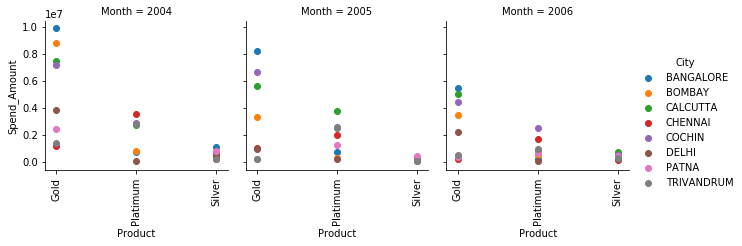

In [34]:
print('3. The city wise spend on each product on yearly basis')

g=sns.FacetGrid(df, col="Month", hue="City")
g.map(plt.scatter, "Product", "Spend_Amount")
g.add_legend();
g.set_xticklabels(rotation=90)

In [35]:
df2=Year_Table.groupby([Year_Table.index.month,'City'])[['Spend_Amount']].sum().reset_index()
df2.head()

,Month,City,Spend_Amount
0,1,BANGALORE,11290794.39
1,1,BOMBAY,7975013.00
2,1,CALCUTTA,10818287.40
3,1,CHENNAI,4512252.68
4,1,COCHIN,12572671.27


4.a Monthly comparison of total spends, city wise


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

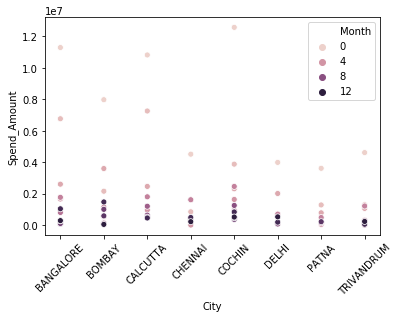

In [36]:
print('4.a Monthly comparison of total spends, city wise')

sns.scatterplot(x='City',y='Spend_Amount',hue='Month',data=df2)
g.add_legend();
plt.xticks(rotation=45)

4.b Comparison of yearly spend on air ticket


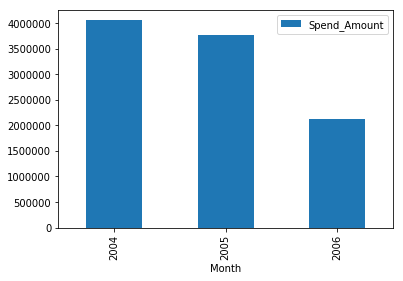

In [37]:
Year_Table2=Year_Table[Year_Table.Type=='AIR TICKET']

print('4.b Comparison of yearly spend on air ticket')

Year_Table2.groupby(Year_Table2.index.year)[['Spend_Amount']].sum().plot(kind='bar')

In [38]:
df3=Year_Table.groupby([Year_Table.index.month,'Product'])[['Spend_Amount']].sum().reset_index()
df3.head()

,Month,Product,Spend_Amount
0,1,Gold,40694326.60
1,1,Platimum,14491018.70
2,1,Silver,4202651.45
3,2,Gold,15526858.59
4,2,Platimum,7850078.64


4.c Monthly comparison of total spends, city wise


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text xticklabel objects>)

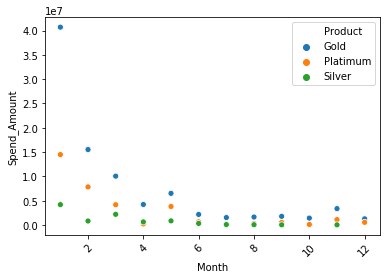

In [39]:
print('4.c Monthly comparison of total spends, city wise')

sns.scatterplot(x='Month',y='Spend_Amount',hue='Product',data=df3)
plt.xticks(rotation=45)

In [41]:
Year_1=Year_Table.groupby([Year_Table.index.year,'Product','City','Customer'])[['Repayment_Amount']].sum().reset_index()

Year_2=Year_Table.groupby([Year_Table.index.month,'Product','City','Customer'])[['Repayment_Amount']].sum().reset_index()


Product_input=input('Enter the product type you wanna see the information for Gold,Silver or Platimum : ')

Time_input=input("Enter how you want to see the output Year or Month : ")

if(Time_input=='Year'):
    Year_Number=input("Enter the year for which you want to see the information i.e. 2004,2005 or 2006 : ")
elif(Time_input=='Month'):
    Month_Number=input("Enter the month number for which you want to see the information: ")
    
array=Year_2.City.unique()

if(Time_input=='Year'):
    for x in range(0,8):
        print('For city',array[x],'the top 10 customers are \n')
        print(Year_1[(Year_1.Month==int(Year_Number))&(Year_1.Product==Product_input)&(Year_1.City==array[x])].nlargest(10,'Repayment_Amount'))
        print('\n\n')
elif(Time_input=='Month'):
    for x in range(0,8):
        print('For city',array[x],'the top 10 customers are \n')
        print(Year_2[(Year_2.Month==int(Month_Number))&(Year_2.Product==Product_input)&(Year_2.City==array[x])].nlargest(10,'Repayment_Amount'))
        print('\n\n')

Enter the product type you wanna see the information for Gold,Silver or Platimum : Gold
Enter how you want to see the output Year or Month : Month
Enter the month number for which you want to see the information: 3
For city BANGALORE the top 10 customers are 

     Month Product       City Customer  Repayment_Amount
116      3    Gold  BANGALORE      A43        1540229.91
115      3    Gold  BANGALORE      A14         782768.78
114      3    Gold  BANGALORE      A13         575551.13
117      3    Gold  BANGALORE      A81         207780.32
118      3    Gold  BANGALORE      A88         146821.30



For city BOMBAY the top 10 customers are 

     Month Product    City Customer  Repayment_Amount
120      3    Gold  BOMBAY      A17         970413.51
121      3    Gold  BOMBAY      A42         649926.09
119      3    Gold  BOMBAY      A12         393141.72



For city CALCUTTA the top 10 customers are 

     Month Product      City Customer  Repayment_Amount
123      3    Gold  CALCUTTA   